# Portfolio Project

## About the dataset

Searching for Contamination Sources. This may sound simple because you only have a two-dimensional input, however it is a very difficult problem. It corresponds to trying to find the source of radiation in some square area. However, you can only detect the radiation once you are very close to it, meaning most of the readings will be zero. **There are two sources, one is not too dangerous, so make sure you try to find both modes of the function.***

## Import section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import SGDRegressor

## Data loading and analysis

In [2]:
#let's load the dataset as a pandas dataframe
df = pd.read_csv("./Life Expectancy Data.csv")

In [3]:
#let's take a look at the data
df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under Five Deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling'],
      dtype='object')

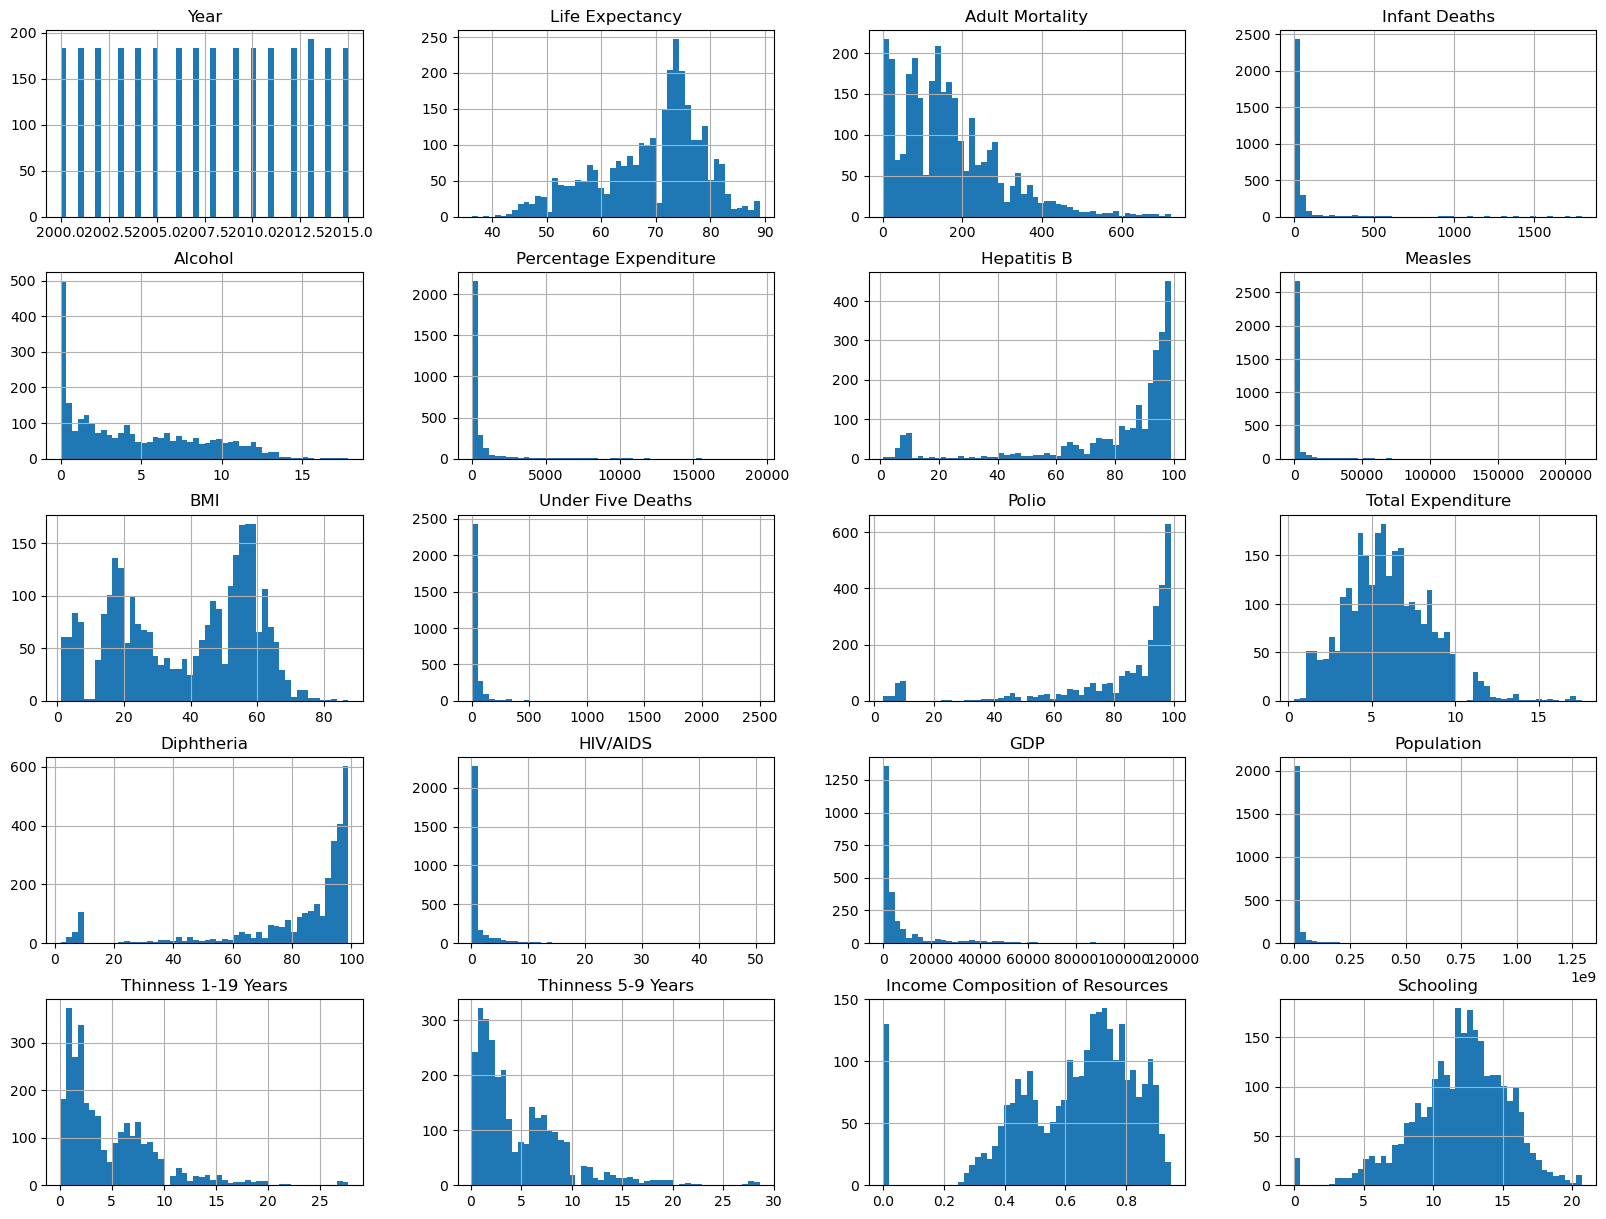

In [7]:
#df.hist(figsize=[12,12])
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
df.shape

(2938, 22)

Let's check the correlation of each feature with the target variable

In [9]:
df.corrwith(df["Life Expectancy"])

Year                               0.170033
Life Expectancy                    1.000000
Adult Mortality                   -0.696359
Infant Deaths                     -0.196557
Alcohol                            0.404877
Percentage Expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
BMI                                0.567694
Under Five Deaths                 -0.222529
Polio                              0.465556
Total Expenditure                  0.218086
Diphtheria                         0.479495
HIV/AIDS                          -0.556556
GDP                                0.461455
Population                        -0.021538
Thinness 1-19 Years               -0.477183
Thinness 5-9 Years                -0.471584
Income Composition of Resources    0.724776
Schooling                          0.751975
dtype: float64

**Year, Infant Deaths, Hepatitis B, Measles, Under Five Deaths, Total Expenditure, Population** have a weak correlation with the predicted variable.

We are going to exclude them from the list of features.

## Data Cleaning

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 Years                 34
Thinness 5-9 Years                  34
Income Composition of Resources    167
Schooling                          163
dtype: int64

If we dropp missing values we remove 40% of the dataset.
It's better to fill missing values with the mean

In [11]:
# Drop all rows with NaNs
#df.dropna(axis=0, inplace=True)

# Show the new number of rows after removing all NaNs
#df.shape

In [12]:
# non mumeric fields have no null values, so we can fill missing ones with the mean
df.fillna(df.mean(), inplace=True)

C:\Users\catucci\AppData\Local\Temp\ipykernel_27184\283933254.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


## Extract predictors and target dataframes

In [13]:
# we are interested in a subset of the predictors

X = df[['Country', 'Adult Mortality', 'Alcohol', 'Percentage Expenditure', 
        'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Thinness 1-19 Years', 
        'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling']]

In [14]:
# life expectancy is our target variable
y = df['Life Expectancy']

## Data Encoding

In [15]:
# Encode the entire dataset (all features with object type) using one-hot encoding
X = pd.get_dummies(X)

# Show the first features (encoded)
X.head()

,Adult Mortality,Alcohol,Percentage Expenditure,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Thinness 1-19 Years,Thinness 5-9 Years,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,263.0,0.01,71.279624,19.1,6.0,65.0,0.1,584.259210,17.2,17.3,...,0,0,0,0,0,0,0,0,0,0
1,271.0,0.01,73.523582,18.6,58.0,62.0,0.1,612.696514,17.5,17.5,...,0,0,0,0,0,0,0,0,0,0
2,268.0,0.01,73.219243,18.1,62.0,64.0,0.1,631.744976,17.7,17.7,...,0,0,0,0,0,0,0,0,0,0
3,272.0,0.01,78.184215,17.6,67.0,67.0,0.1,669.959000,17.9,18.0,...,0,0,0,0,0,0,0,0,0,0
4,275.0,0.01,7.097109,17.2,68.0,68.0,0.1,63.537231,18.2,18.2,...,0,0,0,0,0,0,0,0,0,0


## Data Scaling

Official sci-kit documentation: *Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.*

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Regression Model

We are going to use and evaluate the SGDRegressor with default parameters on our dataset.
Then, we are going to optimize hyperparamter to improve performances

In [17]:
model = SGDRegressor()
model.fit(X,y)
#scores = cross_val_score(model, X, y, cv=3,scoring='accuracy')
scores = cross_val_score(model, X, y, cv=3)
print("Score:"+ str(scores.mean()))

Score:0.7389689224181014


Let's see the default parameters used that have been used

In [18]:
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Hyperparameters tuning

We'll try to tune hyperparameters using **Grid Search** and **Bayesian Optimization** medthods

### Grid Search

In [20]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space

params_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [1000, 2000, 3000],
    'early_stopping': [True, False]
}

grid_search = GridSearchCV(model, params_grid, cv=3)
grid_search.fit(X, y)
print("Best score: " + str(grid_search.best_score_))


Best score: 0.7796910105535382


We obtained the improved score **0.78** over **0.74**, let's see the associated hyper parameters

In [21]:
grid_search.best_params_

{'alpha': 0.01,
 'early_stopping': True,
 'learning_rate': 'adaptive',
 'loss': 'squared_error',
 'max_iter': 3000,
 'penalty': 'l1'}

### Bayesian Optimization

In [22]:
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# Define the hyperparameter configuration space
params_bayes = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [1000, 2000, 3000],
    'early_stopping': [True, False]
}

bayes_search = BayesSearchCV(model, params_bayes, cv=3, n_iter=50, n_jobs=-1)
bayes_search.fit(X, y)
bayes_model = bayes_search.best_estimator_
print("Best score:"+ str(bayes_search.best_score_))

Best score:0.77337049934426


We obtained the improved score **0.77** over **0.74**, let's see the associated hyper parameters

In [23]:
bayes_search.best_params_

OrderedDict([('alpha', 0.01),
             ('early_stopping', True),
             ('learning_rate', 'constant'),
             ('loss', 'squared_error'),
             ('max_iter', 2000),
             ('penalty', 'l1')])

They mostly got the same values for the hyper parameters, except for
 - **learning_rate**: it was "constant" for the Bayesian optimizer, and "adaptive" for the Grid Search.
 - **max_iter**: 2000 in BayesianOptimization, 3000 in Grid Search
 